In [238]:
import os
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

import itertools

from mpl_toolkits.axes_grid1 import ImageGrid

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://github.com/abhinav23dixit/Waste-Classification

# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/

# plot image
# https://www.tensorflow.org/tutorials/images/classification
# https://github.com/msminhas93/KerasImageDatagenTutorial/blob/master/DataGenTutorial.ipynb

In [135]:
base_dir = 'Recycling_Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [136]:
print('total training images:', len(os.listdir(train_dir)))
print('total testing images:', len(os.listdir(test_dir)))
print('total validation images:', len(os.listdir(validation_dir)))

total training images: 6
total testing images: 635
total validation images: 6


In [5]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [6]:
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8
# next_cat_pix = [os.path.join(train_cats_dir, fname) 
#                 for fname in train_cat_fnames[pic_index-8:pic_index]]
# next_dog_pix = [os.path.join(train_dogs_dir, fname) 
#                 for fname in train_dog_fnames[pic_index-8:pic_index]]

# for i, img_path in enumerate(next_cat_pix+next_dog_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(256,256),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(256,256),
        batch_size=20,
        class_mode='categorical')

Found 1262 images belonging to 6 classes.
Found 630 images belonging to 6 classes.


In [31]:
# classes training

train_generator.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [32]:
# classes validation

validation_generator.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [33]:
validation_generator.filenames[0:5]

['cardboard\\cardboard100.jpg',
 'cardboard\\cardboard105.jpg',
 'cardboard\\cardboard107.jpg',
 'cardboard\\cardboard112.jpg',
 'cardboard\\cardboard123.jpg']

In [37]:
sample_training_images, _ = next(validation_generator)

In [66]:
class_mapping = {v:k for k,v in validation_generator.class_indices.items()}

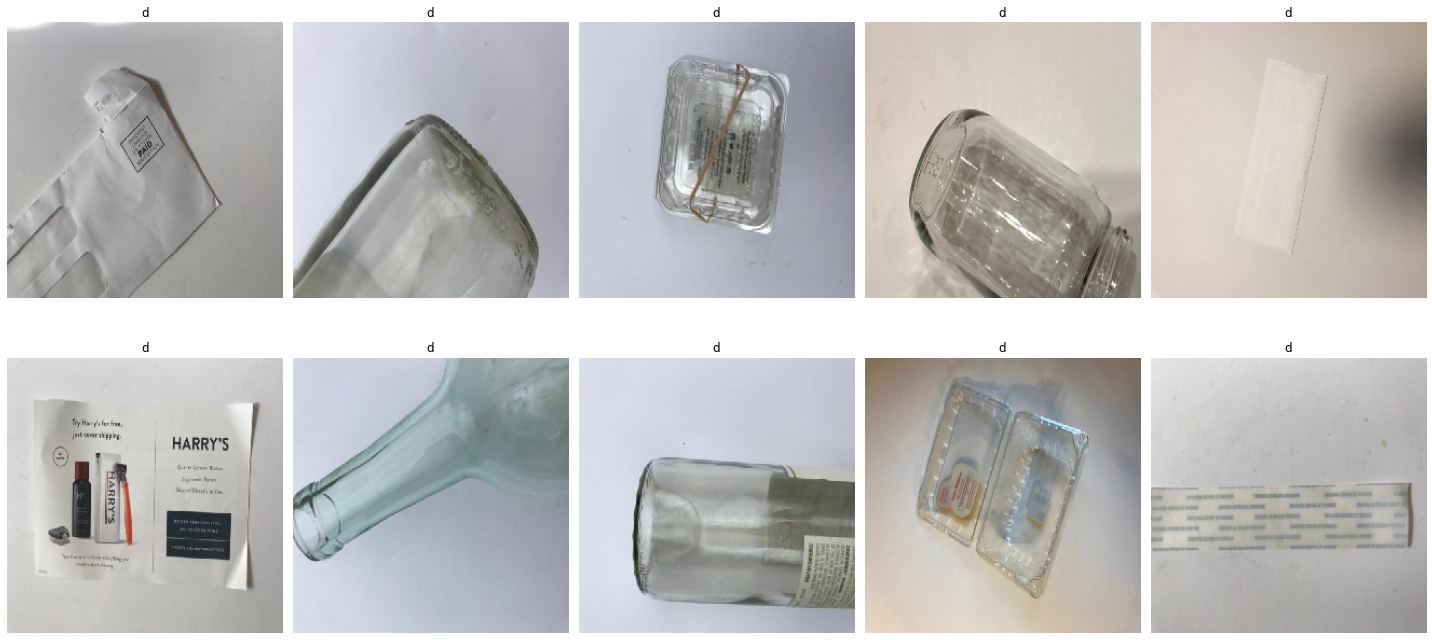

In [70]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('d')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:10])

In [109]:
class_mapping = {v:k for k,v in validation_generator.class_indices.items()}

x,y = next(validation_generator)
print('x: ',type(x))
print('y: ',type(y))
print('x: ',x.shape)
print('y: ',y.shape)

x:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
x:  (20, 256, 256, 3)
y:  (20, 6)


In [110]:
print('Number of samples: ',validation_generator.samples)
print('Number of classes: ',len(validation_generator.class_indices))
print('Number of samples per class:', int(validation_generator.samples/len(validation_generator.class_indices)))

Number of samples:  630
Number of classes:  6
Number of samples per class: 105


In [111]:
import numpy as np
y_int = np.argmax(y,axis=-1)

In [112]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

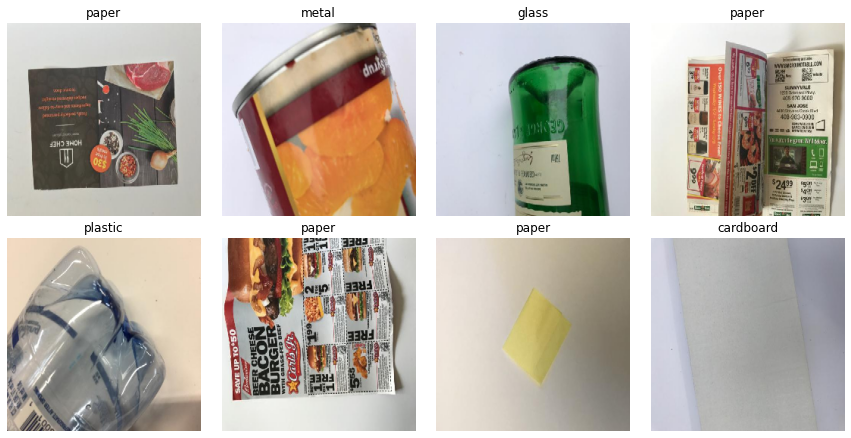

In [118]:
show_grid(x,2,4,label_list=y_int,show_labels=True,figsize=(15,10))

In [8]:
classifier = Sequential()

classifier.add(Convolution2D(input_shape=(256,256,3),filters=96,kernel_size=(11,11),strides=4,activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(filters=256,kernel_size=(5,5),activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(filters=384,kernel_size=(3,3),activation = 'relu'))
classifier.add(Convolution2D(filters=384,kernel_size=(3,3),activation = 'relu'))
classifier.add(Convolution2D(filters=256,kernel_size=(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
classifier.add(Flatten())

classifier.add(Dense(output_dim=2048,activation='relu'))
classifier.add(Dense(output_dim=2048,activation='relu'))
classifier.add(Dense(output_dim=6,activation='softmax'))

classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

C:\Users\kaush\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2048)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kaush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2048)`
  after removing the cwd from sys.path.
C:\Users\kaush\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=6)`
  """


In [10]:
history=classifier.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=228)

Epoch 1/5
100/100 [==============================] - 145s 1s/step - loss: 1.9449 - accuracy: 0.2317 - val_loss: 1.6752 - val_accuracy: 0.2514
Epoch 2/5
100/100 [==============================] - 160s 2s/step - loss: 1.7245 - accuracy: 0.2381 - val_loss: 1.7095 - val_accuracy: 0.1967
Epoch 3/5
100/100 [==============================] - 147s 1s/step - loss: 1.7277 - accuracy: 0.2332 - val_loss: 1.6890 - val_accuracy: 0.2359
Epoch 4/5
100/100 [==============================] - 150s 1s/step - loss: 1.7269 - accuracy: 0.2381 - val_loss: 1.6582 - val_accuracy: 0.2361
Epoch 5/5
100/100 [==============================] - 189s 2s/step - loss: 1.7232 - accuracy: 0.2332 - val_loss: 1.7379 - val_accuracy: 0.2341


In [13]:
# Performance matrix 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,val_loss,val_accuracy,loss,accuracy,epoch
0,1.675167,0.251448,1.949636,0.231670,0
1,1.709512,0.196659,1.723894,0.238143,1
2,1.688968,0.235857,1.729693,0.233198,2
3,1.658159,0.236080,1.727978,0.238143,3
4,1.737896,0.234076,1.727941,0.233198,4


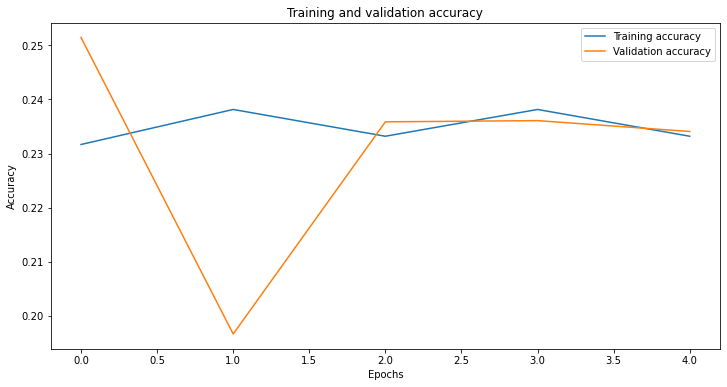

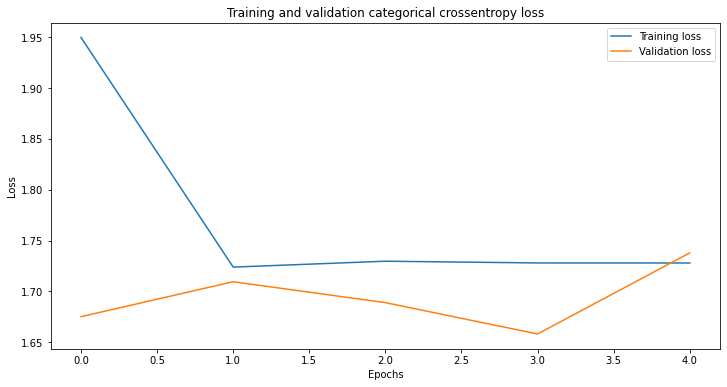

In [22]:
# Graph: Training and Validation dataset performance

plt.rcParams['figure.figsize'] = (12.0, 6.0)

def plot_cnn_performance(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Training accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Validation accuracy')
    plt.legend()
  

    plt.figure()
    plt.xlabel('Epochs')
    plt.title('Training and validation categorical crossentropy loss')
    plt.plot(hist['epoch'], hist['loss'],label='Training loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


plot_cnn_performance(history)

In [120]:
#Evaluate model performance on validation dataset

score = classifier.evaluate_generator(validation_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Test loss: 1.6767975091934204
Test accuracy: 0.23492063581943512


In [227]:
#Evaluate model performance on training dataset

score = classifier.evaluate_generator(train_generator)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 1.4725570678710938
Train accuracy: 0.23534072935581207


In [223]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        directory=test_dir,  # This is the source directory for training images
        target_size=(256,256),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode=None,
        shuffle=False,
        seed=42)
 
    
# waste_types = ['cardboard','glass','metal','paper','plastic','trash']
# test_generator = test_datagen.flow_from_directory(
#         directory=test_dir,  # This is the source directory for training images
#         target_size=(256,256),  # All images will be resized to 150x150
#         batch_size=10,
#         # Since we use binary_crossentropy loss, we need binary labels
#         classes=waste_types,
#         shuffle=False,
#         seed=42)

Found 635 images belonging to 1 classes.


In [232]:
loss, accuracy = classifier.evaluate_generator(test_generator,
            steps=test_generator.samples//test_generator.batch_size)

In [229]:
print("Accuracy: %f\nLoss: %f" % (accuracy,loss))

Accuracy: 0.234127
Loss: 1.658341


In [244]:
Y_pred = classifier.predict_generator(test_generator,verbose=1, steps=test_generator.samples//test_generator.batch_size)

635/635 [==============================] - 14s 22ms/step


In [245]:
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)
cnf_matrix

array([[  0, 635],
       [  0,   0]], dtype=int64)

In [235]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)

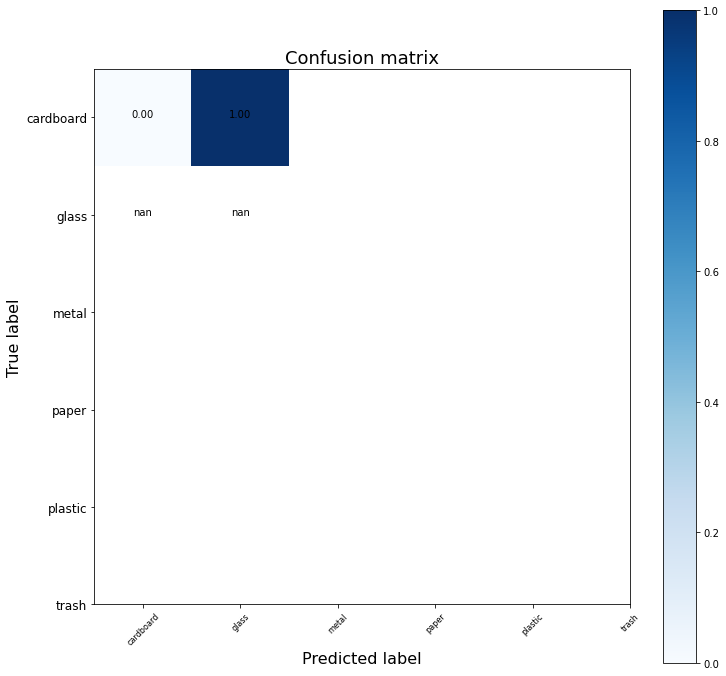

In [239]:
plot_confusion_matrix(cnf_matrix, list(class_mapping.values()))

In [151]:
predict=classifier.predict_generator(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)

In [154]:
y_classes

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [173]:
classifier.save('model_test_v1.h5')

In [211]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [213]:
test_imgs, test_labels = next(test_generator)
# plots(test_imgs, titles=test_labels)
test_imgs

ValueError: not enough values to unpack (expected 2, got 1)

In [217]:
predictions=classifier.predict_generator(test_generator,steps=1,verbose=0)
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

In [210]:
predict

array([[0.1575426 , 0.1911274 , 0.16825701, 0.2293383 , 0.19057055,
        0.06316411]], dtype=float32)

In [206]:

confusion_matrix(test_generator.classes,y_predict)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [183]:
from os import listdir
from os.path import isfile, join

classifier.load_weights("model_test_v1.h5")

file_path = "Recycling_Data\\test\\Test_Folder"
onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]


In [181]:
from keras_preprocessing import image

test_dir

'Recycling_Data\\test'

In [195]:

for image_file in onlyfiles:
    print(image_file)
    img = image.load_img(file_path +"\\"+ image_file, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x.reshape((1,)+x.shape)
    print(classifier.predict(x))
#     if classifier.predict(x) < 0.3:
#         print(image_file + ": Must be a cat")
#     if classifier.predict(x) > 0.7:
#         print(image_file + ": Must be a dog")
#     if classifier.predict(x) > 0.3 and model.predict(x) < 0.7:
#         print(image_file + ": Not sure if its a cat or a dog")

cardboard101.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard104.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard109.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard11.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard116.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard121.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard124.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard129.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard135.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard140.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard145.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
cardboard148.jpg
[[0.1575426  0.1911274  0.1

[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass447.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass450.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass453.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass455.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass459.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass46.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass461.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass466.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass468.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass470.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass472.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
glass48.jpg
[[0.15

[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal375.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal377.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal378.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal379.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal382.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal384.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal386.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal388.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal389.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal393.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal40.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
metal400.jpg
[[0.1

paper393.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper394.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper398.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper405.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper406.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper408.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper41.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper411.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper413.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper420.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper424.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper430.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
paper

[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic209.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic215.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic218.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic22.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic221.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic223.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic226.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic228.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic234.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic238.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
plastic248.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.0631641

[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash102.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash109.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash110.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash118.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash12.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash122.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash123.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash133.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash134.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash15.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash19.jpg
[[0.1575426  0.1911274  0.16825701 0.2293383  0.19057055 0.06316411]]
trash21.jpg
[[0.1575

array([3, 3], dtype=int64)